In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore', UserWarning)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score


In [154]:
data = pd.read_csv('BodyFat.csv')

train_features = data.drop(['IDNO', 'BODYFAT'], axis=1).columns
target = data['BODYFAT']

In [155]:
#筛选异常值
# 计算四分位数
Q1 = data['BODYFAT'].quantile(0.25)
Q3 = data['BODYFAT'].quantile(0.75)
IQR = Q3 - Q1

# 定义异常值的上下限
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 筛选出异常值
outliers = data[(data['BODYFAT'] < lower_bound) | (data['BODYFAT'] > upper_bound)]

# 打印异常值
print(outliers)

# 打印Bodyfat为0的值
error_0bodyfat = data[data['BODYFAT'] == 0]
print(error_0bodyfat)

# 删除outliers，只保留不是异常值的行
# 从网上的体脂率预测模型预测数据中体脂率为0的个体的预测体脂率，替换体脂率为0的值
df_cleaned = data[(data['BODYFAT'] >= lower_bound) & (data['BODYFAT'] <= upper_bound)]
df_cleaned.loc[181, 'BODYFAT'] = 4.42 # 4.42% Estimated by powerful model from the intenet
print(df_cleaned[df_cleaned['IDNO'] == 182])
print(len(df_cleaned))

     IDNO  BODYFAT  DENSITY  AGE  WEIGHT  HEIGHT  ADIPOSITY  NECK  CHEST  \
215   216     45.1    0.995   51   219.0    64.0       37.6  41.2  119.8   

     ABDOMEN    HIP  THIGH  KNEE  ANKLE  BICEPS  FOREARM  WRIST  
215    122.1  112.8   62.5  36.9   23.6    34.7     29.1   18.4  
     IDNO  BODYFAT  DENSITY  AGE  WEIGHT  HEIGHT  ADIPOSITY  NECK  CHEST  \
181   182      0.0   1.1089   40   118.5    68.0       18.1  33.8   79.3   

     ABDOMEN   HIP  THIGH  KNEE  ANKLE  BICEPS  FOREARM  WRIST  
181     69.4  85.0   47.2  33.5   20.2    27.7     24.6   16.5  
     IDNO  BODYFAT  DENSITY  AGE  WEIGHT  HEIGHT  ADIPOSITY  NECK  CHEST  \
181   182     4.42   1.1089   40   118.5    68.0       18.1  33.8   79.3   

     ABDOMEN   HIP  THIGH  KNEE  ANKLE  BICEPS  FOREARM  WRIST  
181     69.4  85.0   47.2  33.5   20.2    27.7     24.6   16.5  
251


In [156]:
df_cleaned

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,248,11.5,1.0736,70,134.25,67.00,21.1,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,249,32.3,1.0236,72,201.00,69.75,29.1,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,250,28.3,1.0328,72,186.75,66.00,30.2,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,251,25.3,1.0399,72,190.75,70.50,27.0,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [157]:
X = df_cleaned.drop(['IDNO', 'DENSITY','BODYFAT','WEIGHT','HEIGHT'],axis=1)
y = df_cleaned['BODYFAT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


Number of Features: 1, R²: 0.2180
Number of Features: 2, R²: 0.6493
Number of Features: 3, R²: 0.6681
Number of Features: 4, R²: 0.6508
Number of Features: 5, R²: 0.6901
Number of Features: 6, R²: 0.6930
Number of Features: 7, R²: 0.6862
Number of Features: 8, R²: 0.6928
Number of Features: 9, R²: 0.6922
Number of Features: 10, R²: 0.6913
Number of Features: 11, R²: 0.6950
Number of Features: 12, R²: 0.7027


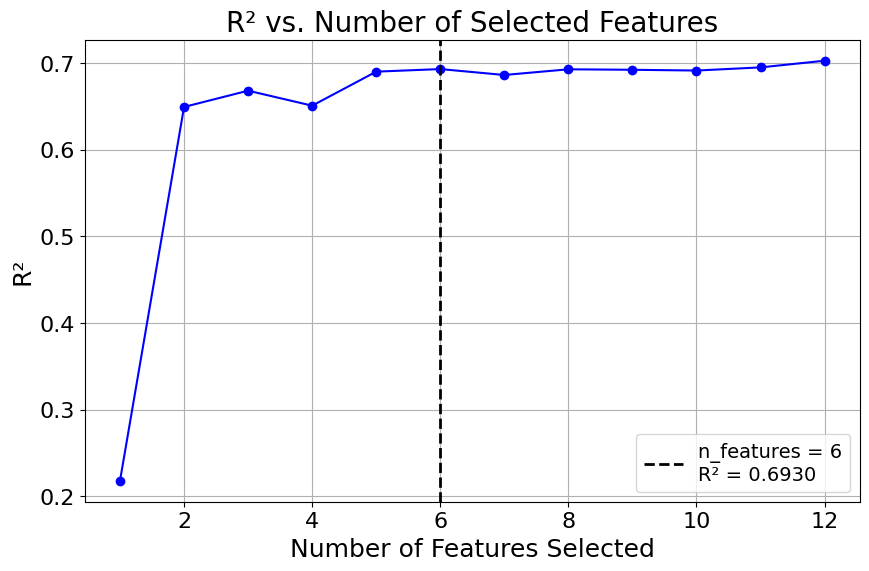

In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score  # 引入 r2_score
import matplotlib.pyplot as plt
import numpy as np

model = LinearRegression()

r2_scores = []  
r2_at_6_features = None  


for n_features in range(1, len(X.columns) + 1):
    
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)

    model.fit(X_train_rfe, y_train)

    y_pred = model.predict(X_test_rfe)

    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

   
    if n_features == 6:
        r2_at_6_features = r2

    print(f"Number of Features: {n_features}, R²: {r2:.4f}")

# R2 vs n_feature
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X.columns) + 1), r2_scores, marker='o', linestyle='-', color='b')

# add x=6
plt.axvline(x=6, color='black', linestyle='--', linewidth=2, label=f'n_features = 6\nR² = {r2_at_6_features:.4f}')

plt.xlabel('Number of Features Selected', fontsize=18)
plt.ylabel('R²', fontsize=18)
plt.title('R² vs. Number of Selected Features', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True)

plt.legend(fontsize=14, loc='lower right')

plt.savefig('Feature_selection_R2_result.tiff', format='tiff', dpi=1200)
plt.savefig('Feature_selection_R2_result.png', format='png', dpi=1200)
plt.show()


In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score


model = LinearRegression()

# RFE (5 features)
rfe = RFE(estimator=model, n_features_to_select=6)
X_train_rfe = rfe.fit_transform(X_train, y_train) 
X_test_rfe = rfe.transform(X_test)  

# print selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

# fit the model
model.fit(X_train_rfe, y_train)

# predict
y_pred = model.predict(X_test_rfe)

# RMSE & R2
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # 计算 RMSE
r2 = r2_score(y_test, y_pred)

print(f"Test Set MSE: {rmse:.4f}")
print(f"Test Set R²: {r2:.4f}")

# Intercept & coeff
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)



Selected Features: Index(['ADIPOSITY', 'NECK', 'ABDOMEN', 'HIP', 'BICEPS', 'WRIST'], dtype='object')
Test Set MSE: 4.4288
Test Set R²: 0.6930
Intercept: 10.718498170714692
Coefficients: [ 0.37496332 -0.56563415  0.79858893 -0.29886789  0.23762448 -1.71562625]


d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


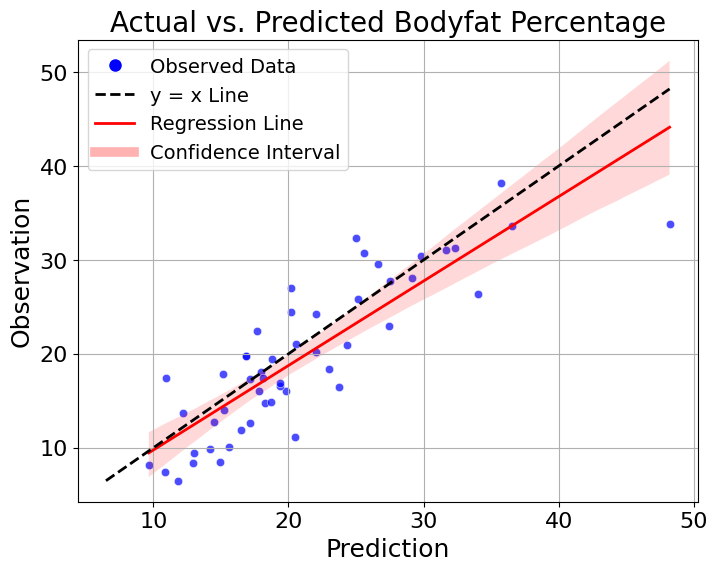

In [160]:
from matplotlib.lines import Line2D  
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# 绘制观察数据的散点图
sns.scatterplot(x=y_pred, y=y_test, color='blue', alpha=0.7, label='Observed Data')

# 绘制回归线，并添加置信区间 (默认 95%)
sns.regplot(
    x=y_pred, y=y_test, ci=95, scatter=False,
    line_kws={'color': 'red', 'lw': 2, 'label': 'Regression Line'}
)

# 绘制 y = x 参考线
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='y = x Line') 

# 自定义图例元素
legend_elements = [
    Line2D([0], [0], color='blue', marker='o', linestyle='None', markersize=8, label='Observed Data'),
    Line2D([0], [0], color='black', lw=2, linestyle='--', label='y = x Line'),
    Line2D([0], [0], color='red', lw=2, label='Regression Line'),
    Line2D([0], [0], color='red', lw=7, alpha =0.3,label='Confidence Interval')
]

plt.legend(handles=legend_elements, loc='upper left', fontsize=14)

# 设置标签和标题
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Observation', fontsize=18)
plt.title('Actual vs. Predicted Bodyfat Percentage', fontsize=20)

# 调整刻度字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 开启网格
plt.grid(True)

# 保存为 TIFF 和 PNG 格式
plt.savefig('Agreement.tiff', format='tiff', dpi=1200)
plt.savefig('Agreement.png', format='png', dpi=1200)

plt.show()


d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


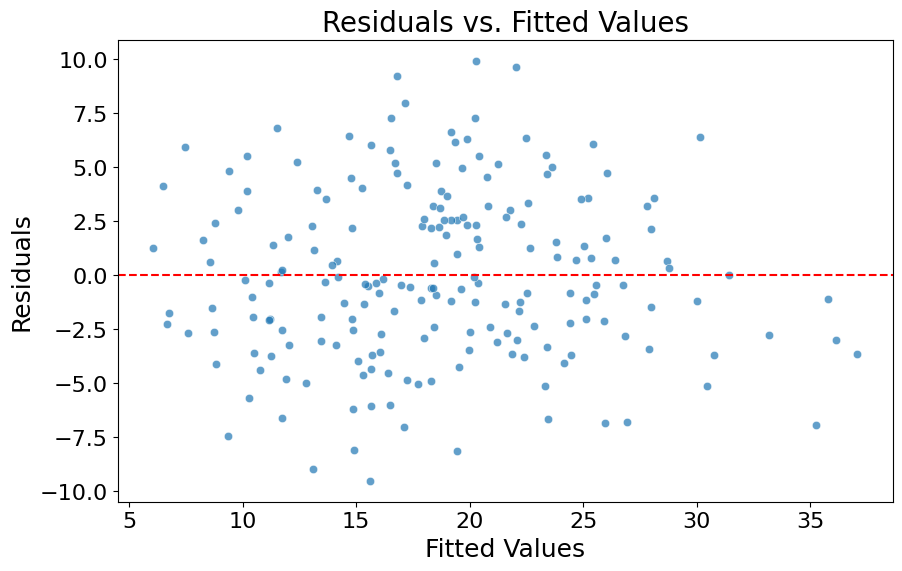

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_train = model.predict(X_train_rfe)  # Y_hat
residuals = y_train - y_pred_train         # residual

# scatter plot of residual vs y_hat
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_train, y=residuals, alpha=0.7)

# y=0
plt.axhline(0, color='red', linestyle='--')

# legend & label
plt.title('Residuals vs. Fitted Values',fontsize=20)
plt.xlabel('Fitted Values',fontsize=18)
plt.ylabel('Residuals',fontsize=18)



# label font
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig('Residuals vs. Fitted Values.tiff', format='tiff', dpi=1200)
plt.savefig('Residuals vs. Fitted Values.png', format='png', dpi=1200)
plt.show()


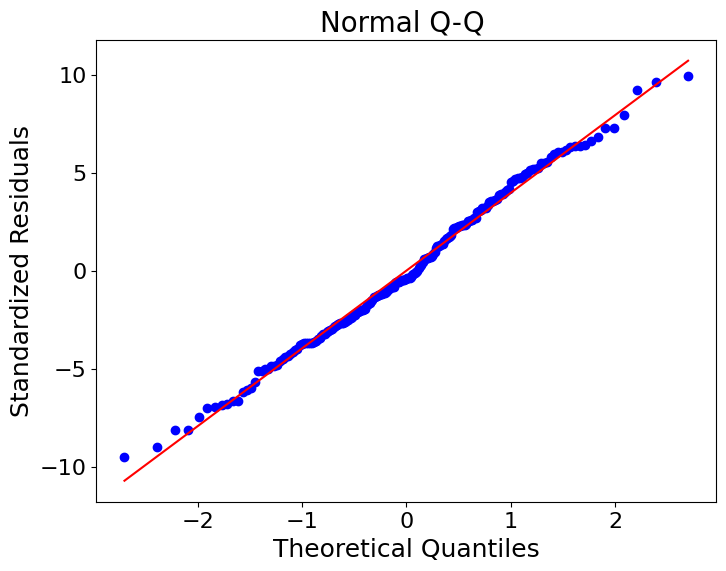

In [162]:
import matplotlib.pyplot as plt
import scipy.stats as stats


y_pred_train = model.predict(X_train_rfe) 
residuals = y_train - y_pred_train         

# qq plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)  


plt.title('Normal Q-Q ',fontsize=20)

plt.xlabel('Theoretical Quantiles',fontsize=18)
plt.ylabel('Standardized Residuals',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig('Normal Q-Q.tiff', format='tiff', dpi=1200)
plt.savefig('Normal Q-Q.png', format='png', dpi=1200)
plt.show()


In [163]:
from statsmodels.stats.stattools import durbin_watson


y_pred_train = model.predict(X_train_rfe)
residuals = y_train - y_pred_train        

#Durbin-Watson Test
dw_statistic = durbin_watson(residuals)
print(f'Durbin-Watson Test Statistic: {dw_statistic:.4f}')

# Interpret the results
if 1.5 < dw_statistic < 2.5:
    print("No significant autocorrelation detected in the residuals; the independence assumption holds.")
else:
    print("Significant autocorrelation detected in the residuals; the independence assumption may be violated.")



Durbin-Watson Test Statistic: 1.7823
No significant autocorrelation detected in the residuals; the independence assumption holds.
